## Day 18 Ensemble Learning
4/Jan/2022, Tuesday

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, RandomForestRegressor, BaggingRegressor

In [3]:
from sklearn.datasets import make_moons

In [88]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [23]:
from matplotlib.colors import ListedColormap

## Dataset Generation

In [38]:
X, y = make_moons(n_samples=10000, noise=0.1, random_state=10)
print(X.shape, y.shape)

(10000, 2) (10000,)


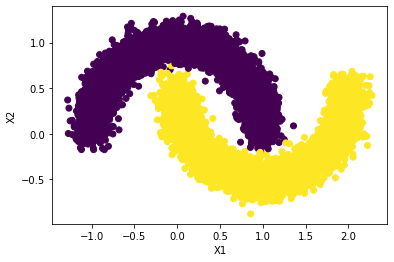

In [39]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

## Bagging

In [58]:
base_clf = DecisionTreeClassifier(max_depth=5)
bag_clf = BaggingClassifier(base_estimator=base_clf, n_estimators=500,  oob_score=True, max_samples=100, max_features=1, 
                            bootstrap_features=True)

In [59]:
bag_clf.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  bootstrap_features=True, max_features=1, max_samples=100,
                  n_estimators=500, oob_score=True)

In [51]:
x1 = np.linspace(X[:,0].min(), X[:,0].max(), 100)
x2 = np.linspace(X[:,1].min(), X[:,1].max(), 100)

x1, x2 = np.meshgrid(x1,x2)

x1, x2 = x1.reshape(-1,1), x2.reshape(-1,1)
x_test = np.concatenate([x1,x2], axis=1)
print(x_test.shape)

(10000, 2)


In [60]:
# make prediction using bagging clf
y_pred = bag_clf.predict(x_test)

In [30]:
## Plotting the decision boundary
colors = ["#b3e4f2","#c5eba0"]
cmap = ListedColormap(colors)

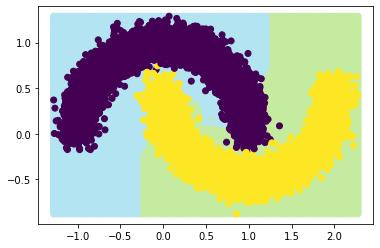

In [61]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_pred, cmap=cmap) # test data points
plt.scatter(X[:,0], X[:,1], c=y) # training data points
plt.show()

In [32]:
bag_clf.oob_score

True

In [45]:
## Bagging classifier attributes
print(bag_clf.base_estimator_)
print(bag_clf.oob_score_) # accuracy of bagging classifier on out of bag samples

DecisionTreeClassifier(max_depth=2)
0.9173


In [46]:
print(bag_clf.oob_decision_function_) # probability corresponding to each class

[[0.93106393 0.06893607]
 [0.0881853  0.9118147 ]
 [0.93638927 0.06361073]
 ...
 [0.93721974 0.06278026]
 [0.04504325 0.95495675]
 [0.93676618 0.06323382]]


In [47]:
ypred_oob_samples =  np.argmax((bag_clf.oob_decision_function_), axis=1)

In [48]:
ypred_oob_samples.shape

(10000,)

In [63]:
bag_clf.score(X,y) # training  acuracy

0.9707

## Random Forest

In [64]:
rf = RandomForestClassifier(n_estimators=100, max_samples=100)

In [65]:
rf.fit(X,y)

RandomForestClassifier(max_samples=100)

In [67]:
rf.score(X,y) # accuracy on training samples

0.9857

In [68]:
ypred2 = rf.predict(x_test)

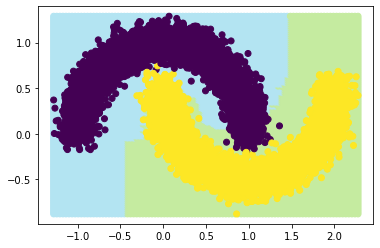

In [69]:
plt.scatter(x_test[:,0], x_test[:,1], c=ypred2, cmap=cmap) # test data points
plt.scatter(X[:,0], X[:,1], c=y) # training data points
plt.show()

## Regressor

In [76]:
## Data generation
n = 500
x = np.linspace(-10,10, n)
noise = np.random.randn(n)
y = x**2 + 15*noise

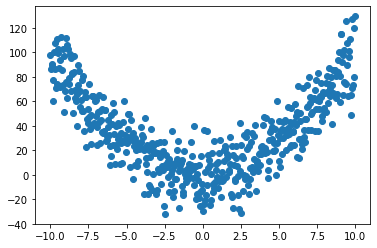

In [77]:
plt.scatter(x, y)
plt.show()

In [79]:
rf_reg = RandomForestRegressor(n_estimators=10, max_samples=0.2, oob_score=True)

In [81]:
rf_reg.fit(x.reshape(-1,1),y)

RandomForestRegressor(max_samples=0.2, n_estimators=10, oob_score=True)

In [82]:
## Prediction line

In [84]:
ypred = rf_reg.predict(x.reshape(-1,1))

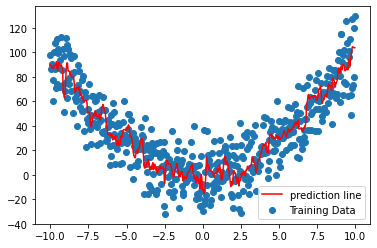

In [85]:
plt.scatter(x, y, label="Training Data")
plt.plot(x, ypred, c='red', label='prediction line')
plt.legend()
plt.show()

In [91]:
dt1 = DecisionTreeRegressor()
dt1.fit(x.reshape(-1,1),y)
ypred1 = dt1.predict(x.reshape(-1,1))

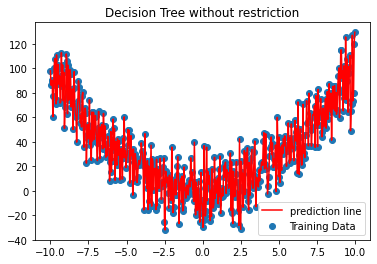

In [92]:
plt.scatter(x, y, label="Training Data")
plt.plot(x, ypred1, c='red', label='prediction line')
plt.legend()
plt.title("Decision Tree without restriction") # overfitting
plt.show()

In [95]:
mdepth = 3
dt2 = DecisionTreeRegressor(max_depth=mdepth)
dt2.fit(x.reshape(-1,1),y)
ypred2 = dt2.predict(x.reshape(-1,1))

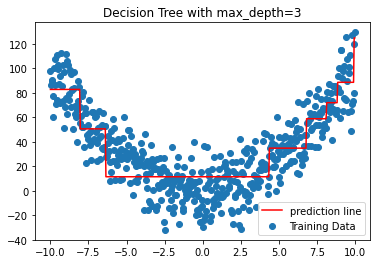

In [98]:
plt.scatter(x, y, label="Training Data")
plt.plot(x, ypred2, c='red', label='prediction line')
plt.legend()
plt.title(f"Decision Tree with max_depth={mdepth}") # regularized model
plt.show()

## Boosting

In [99]:
mdepth = 3
dt1 = DecisionTreeRegressor(max_depth=mdepth)
dt1.fit(x.reshape(-1,1),y)
ypred1 = dt1.predict(x.reshape(-1,1))

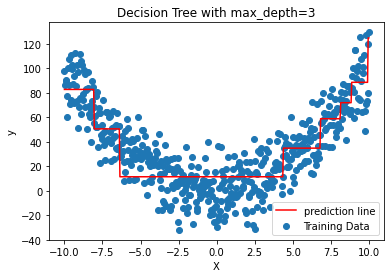

In [100]:
plt.scatter(x, y, label="Training Data")
plt.plot(x, ypred1, c='red', label='prediction line')
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"Decision Tree with max_depth={mdepth}") # regularized model
plt.show()

In [101]:
residual1 = y-ypred1 # residual

In [102]:
mdepth = 3
dt2 = DecisionTreeRegressor(max_depth=mdepth)
dt2.fit(x.reshape(-1,1),residual1)
ypred2 = dt2.predict(x.reshape(-1,1))

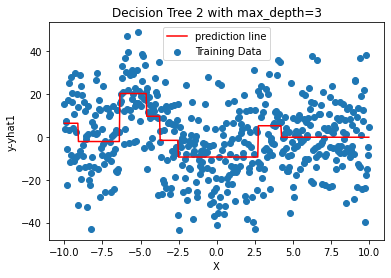

In [103]:
plt.scatter(x, residual1, label="Training Data")
plt.plot(x, ypred2, c='red', label='prediction line')
plt.legend()
plt.xlabel("X")
plt.ylabel("y-yhat1")
plt.title(f"Decision Tree 2 with max_depth={mdepth}") # regularized model
plt.show()

In [104]:
residual2 = residual1-ypred2

In [105]:
mdepth = 3
dt3 = DecisionTreeRegressor(max_depth=mdepth)
dt3.fit(x.reshape(-1,1),residual2)
ypred3 = dt3.predict(x.reshape(-1,1))

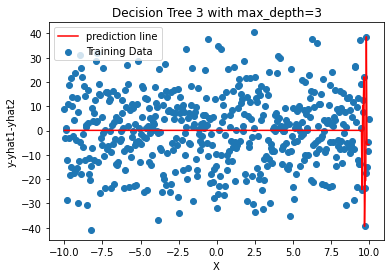

In [107]:
plt.scatter(x, residual2, label="Training Data")
plt.plot(x, ypred3, c='red', label='prediction line')
plt.legend()
plt.xlabel("X")
plt.ylabel("y-yhat1-yhat2")
plt.title(f"Decision Tree 3 with max_depth={mdepth}") # regularized model
plt.show()

In [108]:
## final prediction
ypred = ypred1+ypred2+ypred3 # final prediction of ensemble model

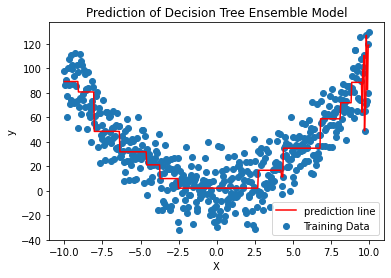

In [109]:
plt.scatter(x, y, label="Training Data")
plt.plot(x, ypred, c='red', label='prediction line')
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"Prediction of Decision Tree Ensemble Model") # regularized model
plt.show()

In [111]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [114]:
gdreg = GradientBoostingRegressor()
gdreg.fit(x.reshape(-1,1),y)
ypred = gdreg.predict(x.reshape(-1,1))

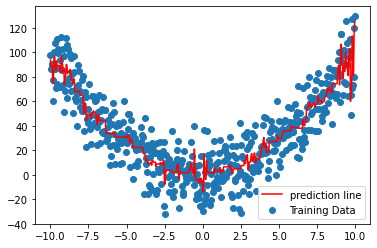

In [115]:
plt.scatter(x, y, label="Training Data")
plt.plot(x, ypred, c='red', label='prediction line')
plt.legend()
plt.show()

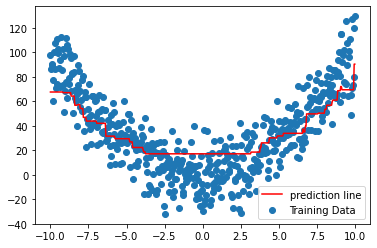

In [116]:
gdreg = GradientBoostingRegressor(n_estimators=10)
gdreg.fit(x.reshape(-1,1),y)
ypred = gdreg.predict(x.reshape(-1,1))
plt.scatter(x, y, label="Training Data")
plt.plot(x, ypred, c='red', label='prediction line')
plt.legend()
plt.show()

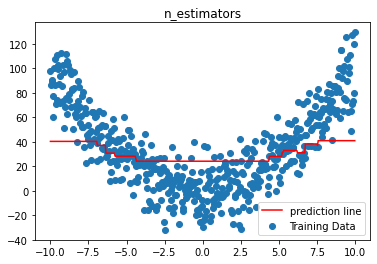

In [121]:
gdreg = GradientBoostingRegressor(n_estimators=3, loss='lad')
gdreg.fit(x.reshape(-1,1),y)
ypred = gdreg.predict(x.reshape(-1,1))
plt.scatter(x, y, label="Training Data")
plt.plot(x, ypred, c='red', label='prediction line')
plt.legend()
plt.title(f"n_estimators")
plt.show()

In [120]:
GradientBoostingRegressor?